In [31]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [32]:
df= pd.read_pickle('../datos/registrados/04-df_registrados.pickle')

In [33]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0,1,festivo,1,2,18.18125,80.5833,10.749882,654
1,2018-01-02,invierno,0,1,no festivo,2,2,17.68695,69.6087,16.652113,670
2,2018-01-03,invierno,0,1,no festivo,3,1,9.47025,43.7273,16.636703,1229
3,2018-01-04,invierno,0,1,no festivo,4,1,10.60610,59.0435,10.739832,1454
4,2018-01-05,invierno,0,1,no festivo,5,1,11.46350,43.6957,12.522300,1518


In [34]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
weathersit          category
atemp                float64
hum                  float64
windspeed            float64
registered             int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [35]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['registered'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,registered
0,invierno,408957
1,otoño,711831
2,primavera,715067
3,verano,835038


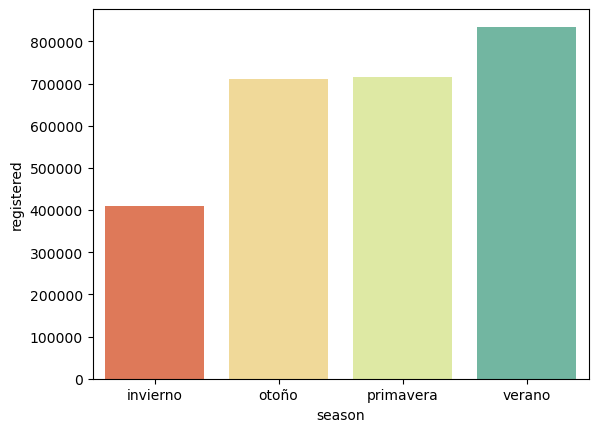

In [36]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [37]:
mapa_season = {'invierno':0, 'primavera':1, 'otoño':1, 'verano':2} 

In [38]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [39]:
holiday = df.groupby('holiday')['registered'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,registered
0,festivo,53777
1,no festivo,2617116


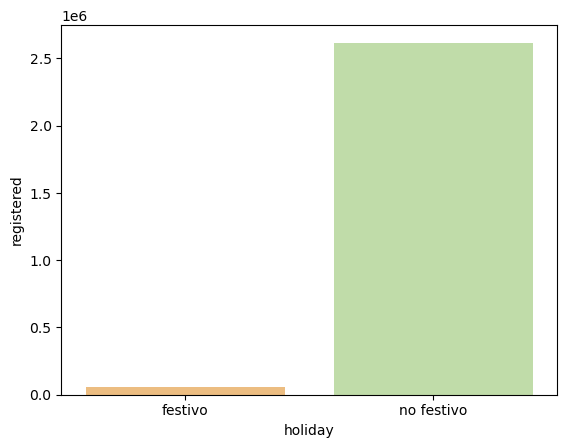

In [40]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [41]:
mapa_holiday = {'festivo':0, 'no festivo':1} 

In [42]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [43]:
df.sample(7)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
202,2018-07-22,2,0,7,1,7,1,42.04480,58.0417,8.917700,2825
199,2018-07-19,2,0,7,1,4,1,37.37395,65.0417,8.750200,3789
78,2018-03-20,0,0,3,1,2,1,16.28750,47.3750,13.917307,1424
711,2019-12-13,1,1,12,1,5,1,14.70940,48.5833,11.666643,5107
4,2018-01-05,0,0,1,1,5,1,11.46350,43.6957,12.522300,1518
625,2019-09-18,2,1,9,1,3,2,28.25335,87.2500,23.958329,3702
536,2019-06-21,2,1,6,1,5,1,37.62710,56.7917,7.958729,5127


---

## WEEKDAY

In [44]:
semana = df.groupby('weekday')['registered'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,registered
0,1,306090
1,2,348041
2,3,396847
3,4,427173
4,5,418467
5,6,410222
6,7,364053


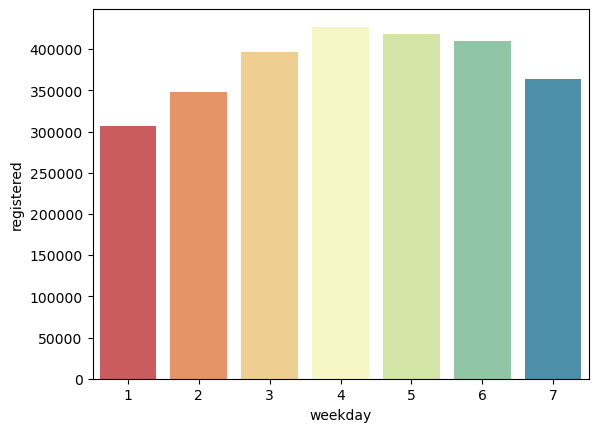

In [45]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [46]:
mapa_weekday = {7:0, 
1:0,
2:1, 
3:2,
4:3, 
5:3,
6:3}

In [47]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [48]:
clima = df.groupby('weathersit')['registered'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,registered
0,1,1811606
1,2,825313
2,3,33974


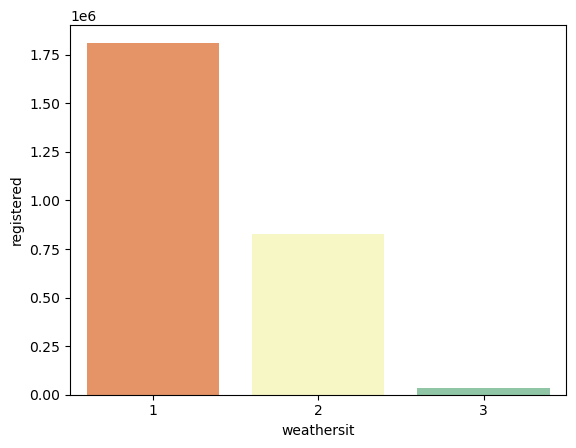

In [49]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [50]:
mapa_weather = {3: 0, 2:1, 1:2}

In [51]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

In [52]:
df.sample(12)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
135,2018-05-16,1,0,5,1,2,2,27.52560,78.7917,8.500357,3185
698,2019-11-30,1,1,11,1,3,2,16.19335,64.9583,3.917544,5306
591,2019-08-15,2,1,8,1,3,2,32.70185,61.9583,11.374657,6149
655,2019-10-18,1,1,10,1,3,1,25.63125,72.8333,15.874779,6501
668,2019-10-31,1,1,10,1,3,1,18.05500,66.6667,11.166689,5147
219,2018-08-08,2,0,8,1,2,2,35.16415,59.2083,12.875725,3480
322,2018-11-19,1,0,11,1,0,2,16.22415,50.2083,15.041232,2720
120,2018-05-01,1,0,5,1,1,1,22.41020,76.2083,7.125718,2213
393,2019-01-29,0,1,1,1,1,2,13.63605,31.1250,16.083350,2685
466,2019-04-12,1,1,4,1,3,2,19.38020,46.6250,19.458743,4746


In [53]:
df.to_pickle('../datos/registrados/05-registrados_encoding.pickle')

In [54]:
df.to_csv('../datos/registrados/05-registrados_encoding.csv')